<a href="https://colab.research.google.com/github/Ehizson/Projects/blob/main/App_Users.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Potential Subscribed Users Data**

Fintech provides their premium application for free for 24 hours. Some of the users subscribe immediately after the trial service. In this case, we explore the subscribed users data.

In [5]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#import dataset

data = pd.read_csv('/content/appdata10.csv')
data.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [9]:
data.shape

(50000, 12)

Days of the week:


*  0 = Sunday
*  1 = Monday
*  2 = Tuesday
*  3 = Wednesday
*  4 = Thursday
*  5 = Friday
*  6 = Saturday


* Screen list is screens that users opened
* Numscreens is number of screens that users opened
* Minigame contains whether the user is playing a minigame(0=No, 1=Yes)
* User premium feature is whether the user use features on premium services(0=No, 1=Yes)
* Enrolled is user subscription decisions(0=No, 1=Yes). The decision is not limited within 24 hours.

In [10]:
data.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                    object
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [12]:
data['screen_list'] = data.screen_list.astype(str) + ','
data['num_screens'] = data.screen_list.str.count(',')
data.drop(columns = ['num_screens'], inplace =True)

In [13]:
#check column hour

data.hour[1]

#there is space in first string '01:00:00'
#slice to get the first two numbers

data.hour = data.hour.str.slice(1,3).astype(int)

In [14]:
#define new variable for numeric data only

data_numeric = data.drop(columns = ['user', 'first_open', 'screen_list',
                                    'enrolled_date'], inplace = False)

In [15]:
data_numeric.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


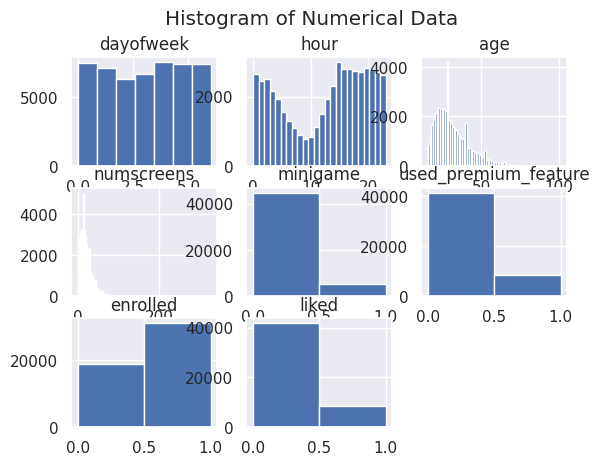

In [16]:
#create histogram

sns.set()
plt.suptitle('Histogram of Numerical Data')
for i in range(0, data_numeric.shape[1]):
  plt.subplot(3, 3, i+1)
  figure = plt.gca()
  figure.set_title(data_numeric.columns.values[i])
  jumlah_bin = np.size(data_numeric.iloc[:, i].unique())
  plt.hist(data_numeric.iloc[:, i], bins = jumlah_bin)

<Axes: >

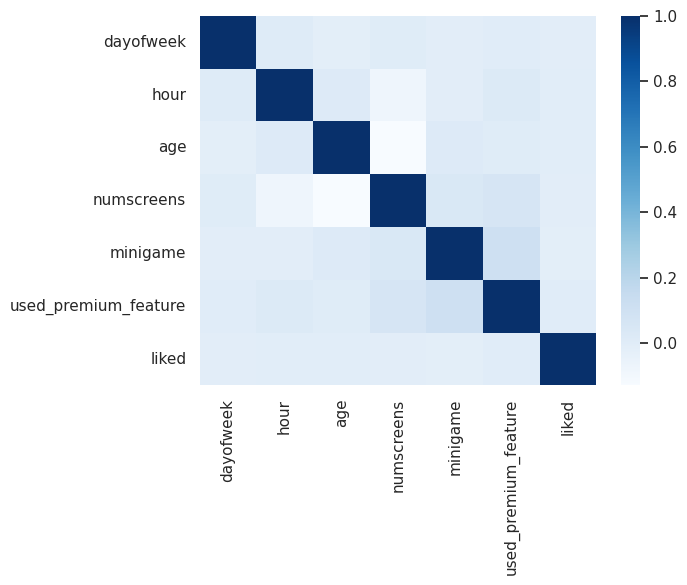

In [17]:
corr_matrix = data_numeric.drop(columns = ['enrolled'], inplace = False).corr()
sns.heatmap(corr_matrix, cmap = 'Blues')